In [91]:

%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from regression import CustomRegression
from regression import Utils
from data_preprocessor import DataPreprocessor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
data = read_csv('./HousingData.csv')
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [93]:
for column_name in data.columns: 
    column_data = data[column_name]
    
    nan_count = np.isnan(column_data).sum()
    
    # if(nan_count > 0):
    #     print(f"Nbr de NaN dans {column_name}: {nan_count}")
    
    #     sns.histplot(column_data, kde=True)
    #     plt.ylabel("Fréquence")
    #     plt.show()

In [94]:
data_preprocessor = DataPreprocessor(log_transform=True)

columns_median = ['AGE', 'CHAS', 'CRIM', 'ZN']
columns_mean = ['LSTAT', 'INDUS']

for col in data:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

# for col in columns_median:
#     median_value = data[col].median()
#     data[col] = data[col].fillna(median_value)
        
# for col in columns_mean:
#     mean_value = data[col].mean()
#     data[col] = data[col].fillna(mean_value)
    
print(np.isnan(data.to_numpy()).sum())


0


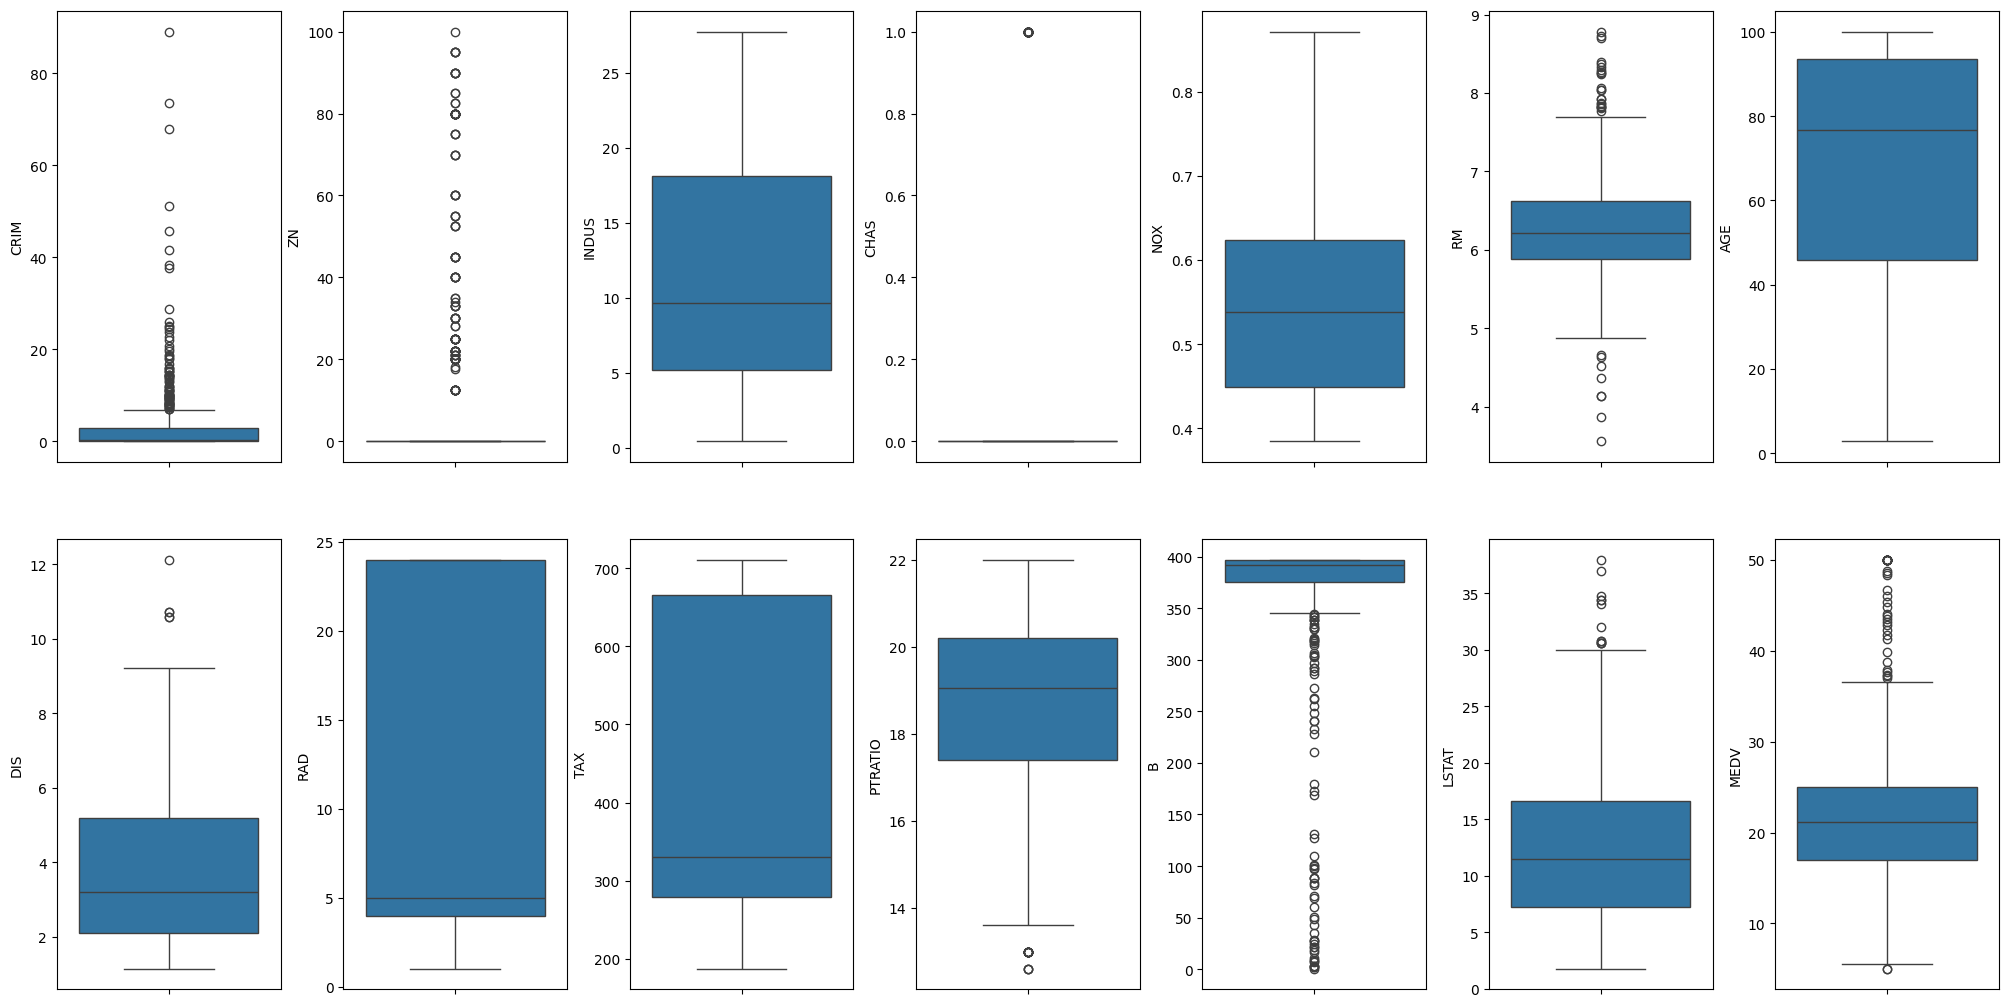

In [95]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [96]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 16.01%
Column ZN outliers = 100.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [97]:
y = data['MEDV']
x = data.drop(columns=['MEDV'])

# print(x.skew())

# for col in x.columns:
#     if np.abs(x[col].skew()) > 0.3:
#         x[col] = np.log1p(x[col])

# y = np.log1p(y)
# print(x.skew())

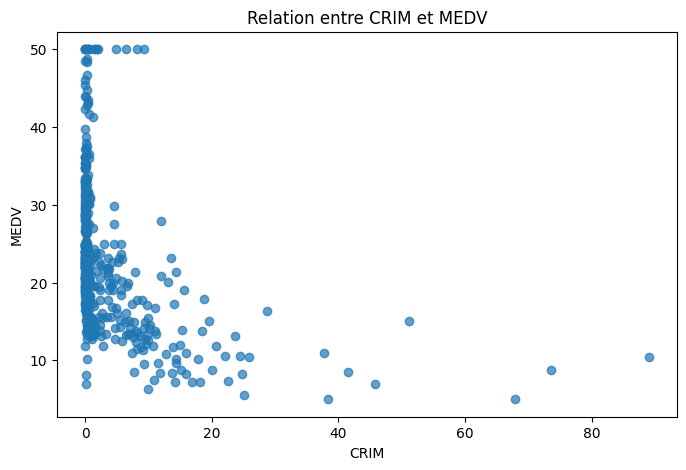

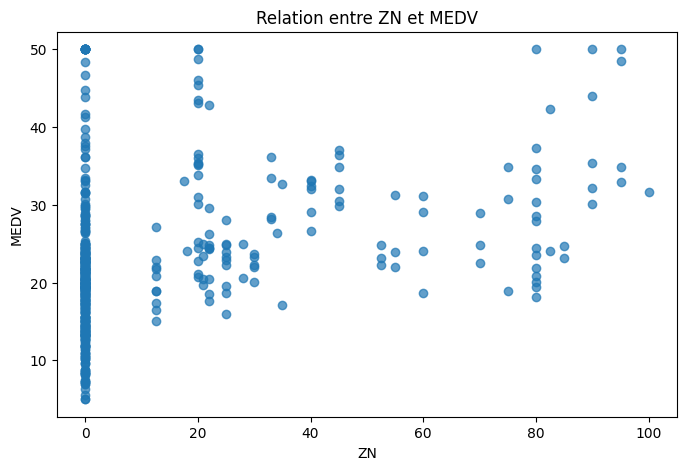

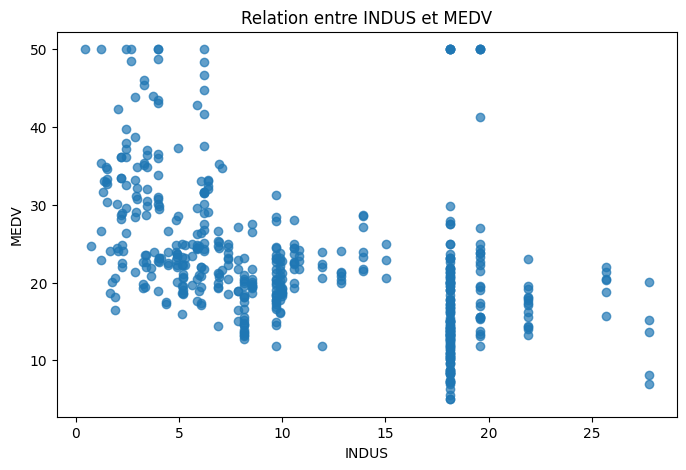

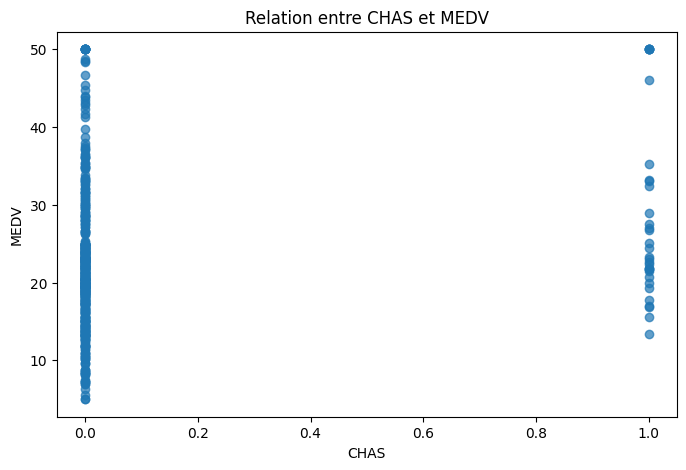

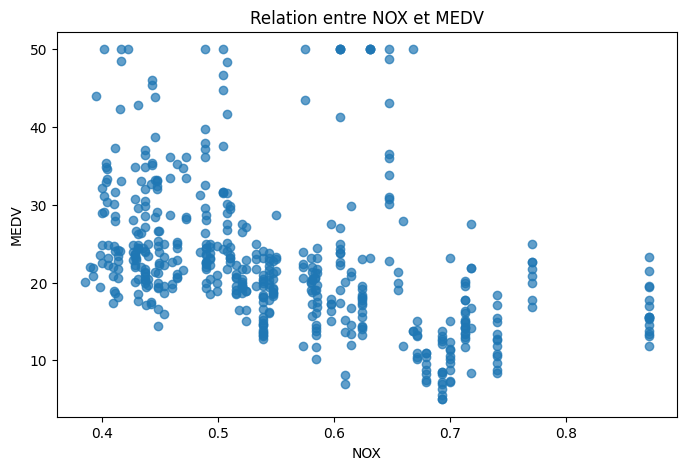

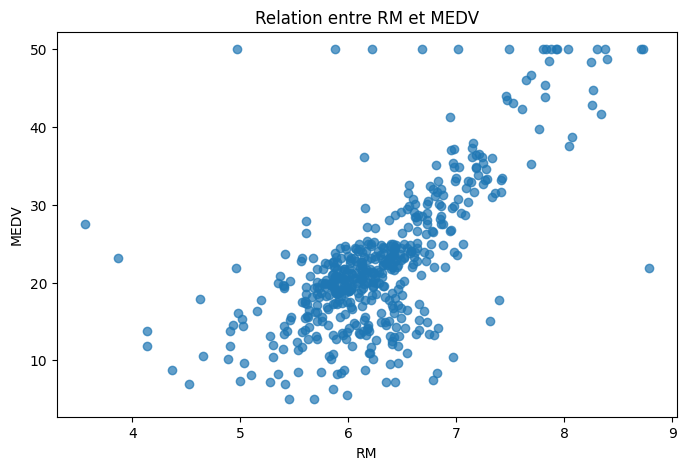

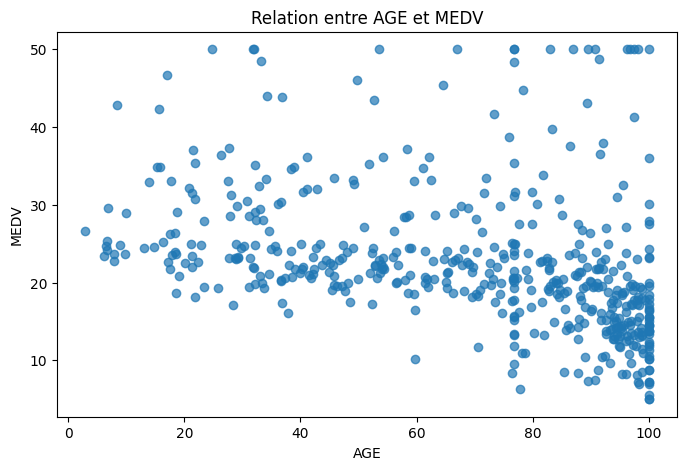

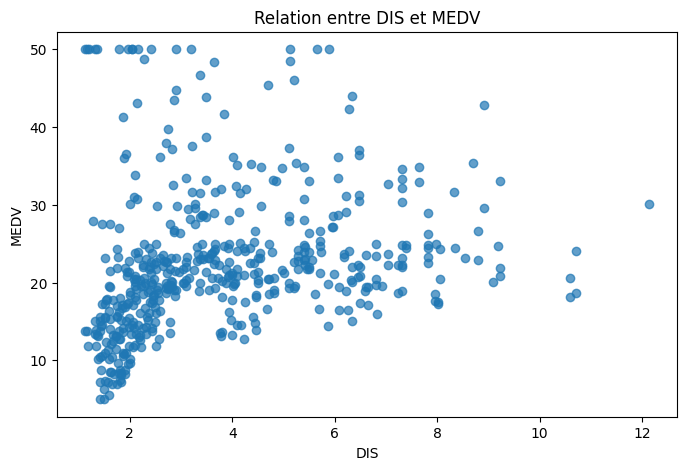

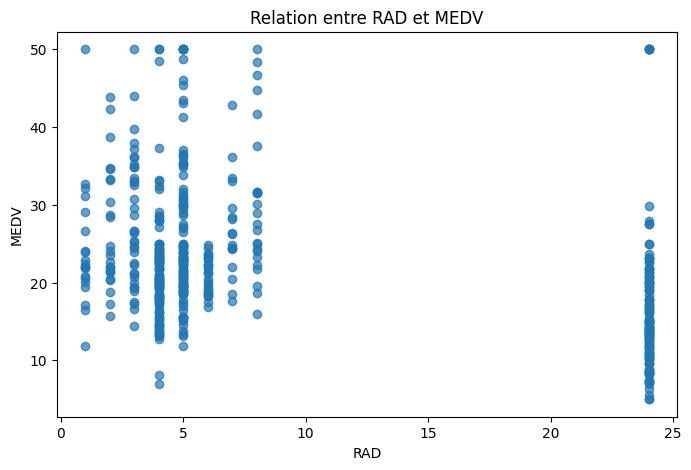

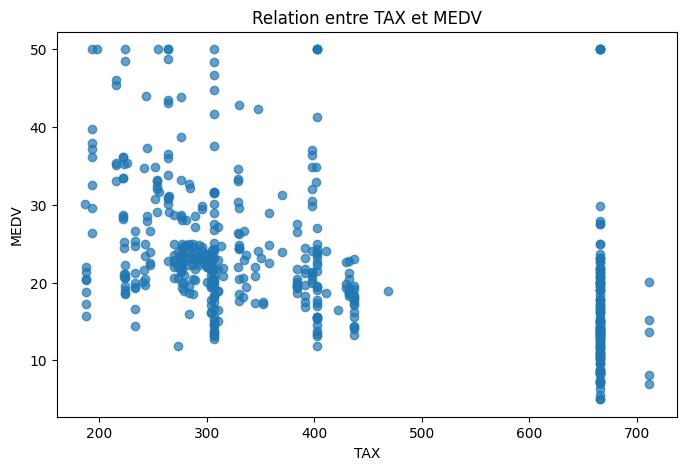

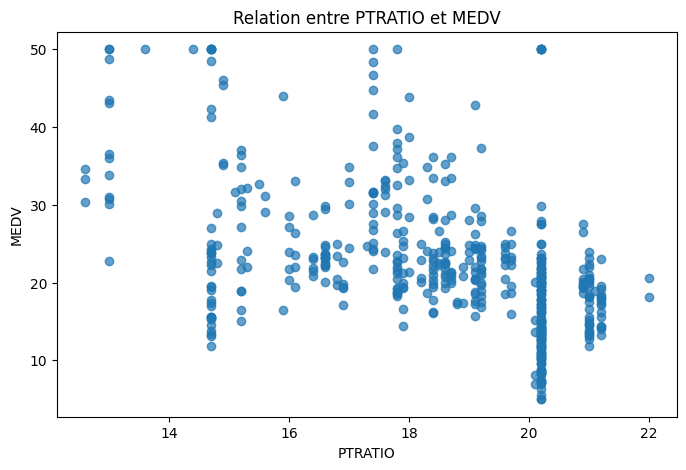

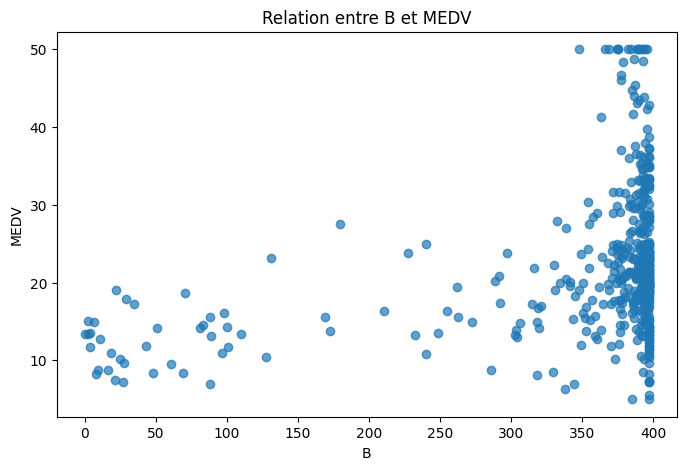

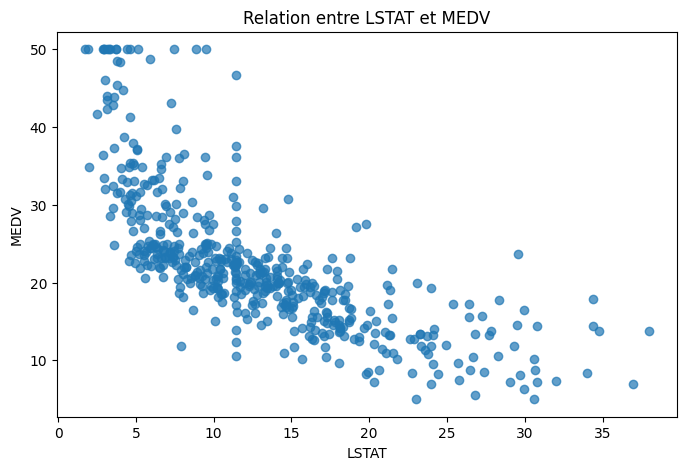

In [103]:
for col in x.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(x[col], y, alpha=0.7)
    plt.title(f"Relation entre {col} et MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")
    plt.show()

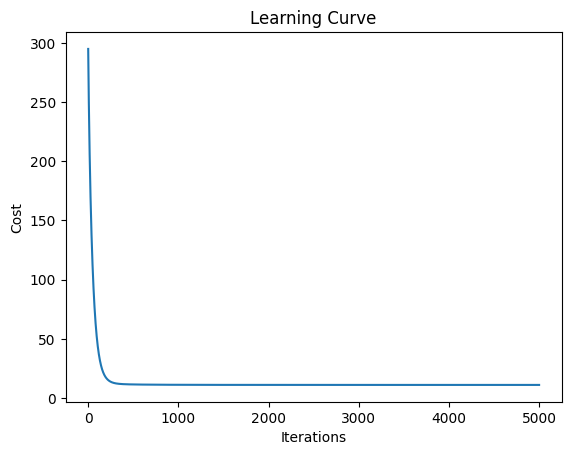

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Tests
degree = 2  
X_train_scaled = Utils.polynomial_features(X_train_scaled, degree)
X_test_scaled = Utils.polynomial_features(X_test_scaled, degree)

regressor = CustomRegression(alpha=0.01, iterations=5000)

theta, cost_history = regressor.gradient_descent(X_train_scaled, y_train)

regressor.learning_curve(cost_history)

# param_grid = {
#     'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1],
#     'iterations': [5000, 10000, 15000, 20000, 30000, 50000, 100000]
# }

# best_model, best_params = Utils.grid_search(X_train_scaled, y_train, X_test_scaled, y_test, param_grid)

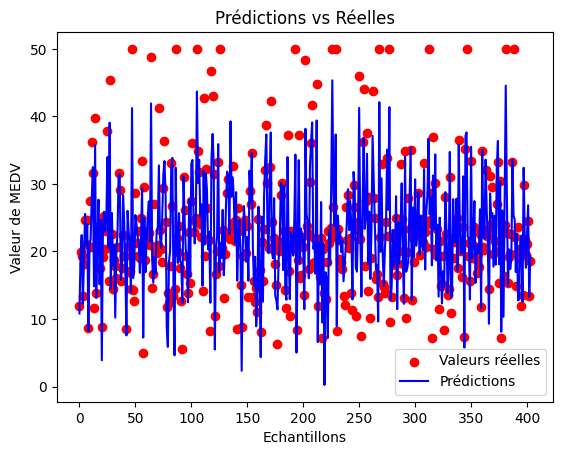

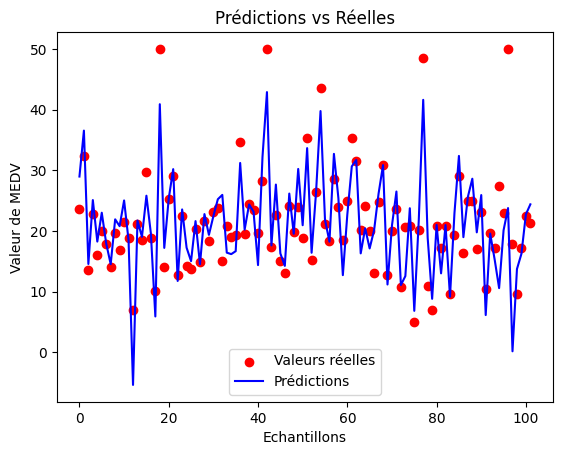

Erreur quadratique moyenne (MSE) : 25.020448870573254
R² : 0.658814153691303


In [105]:
n_samples = y_train.shape[0]
predictions = regressor.predict(X_train_scaled)

plt.scatter(range(n_samples), y_train, color='red', label='Valeurs réelles')
plt.plot(range(n_samples), predictions, color='blue', label='Prédictions')
plt.xlabel('Echantillons')
plt.ylabel('Valeur de MEDV')
plt.legend()
plt.title('Prédictions vs Réelles')
plt.show()

n_samples = y_test.shape[0]
predictions = regressor.predict(X_test_scaled)

plt.scatter(range(n_samples), y_test, color='red', label='Valeurs réelles')
plt.plot(range(n_samples), predictions, color='blue', label='Prédictions')
plt.xlabel('Echantillons')
plt.ylabel('Valeur de MEDV')
plt.legend()
plt.title('Prédictions vs Réelles')
plt.show()

regressor.evaluate(X_test_scaled, y_test)


In [106]:
regressor.save_model("boston_house_model.joblib")

Erreur quadratique moyenne (MSE) : 24.999384790103367
R² : 0.659101389390351


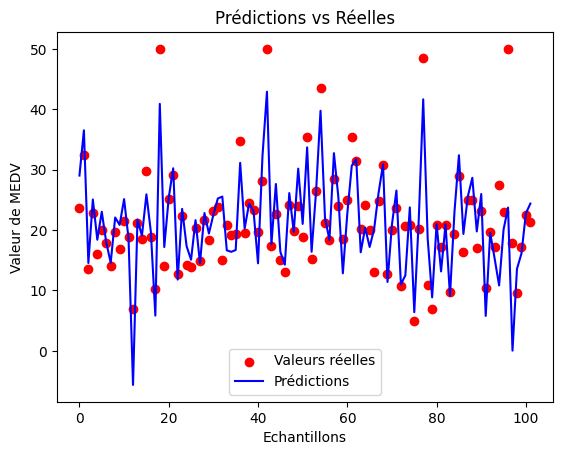

In [107]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"R² : {r2}")

plt.scatter(range(len(y_test)), y_test, color='red', label='Valeurs réelles')
plt.plot(range(len(predictions)), predictions, color='blue', label='Prédictions')
plt.xlabel('Echantillons')
plt.ylabel('Valeur de MEDV')
plt.legend()
plt.title('Prédictions vs Réelles')
plt.show()